In [13]:
import cv2
import numpy as np
%pylab inline
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


/home/juanchosol1996/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [38]:
img = cv2.imread('./ves_full.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

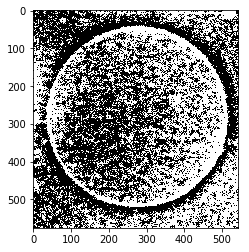

In [55]:
plt.imshow(thresh,cmap=cm.gray)
plt.show()

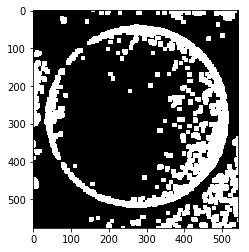

In [52]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg,cmap=cm.gray)
plt.show()

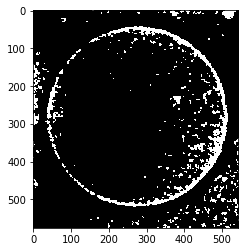

In [61]:
sure_fg = cv2.erode(opening,kernel,iterations=1)
plt.imshow(sure_fg,cmap=cm.gray)
plt.show()